In [13]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pandas as pd
import numpy as np 
from datetime import datetime

import yfinance as yf
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

import sambo
import backtesting
from backtesting import Backtest, Strategy
from backtesting.lib import crossover, SignalStrategy

from backtesting.test import SMA, GOOG

# backtesting.set_bokeh_output(notebook=True)
            
import itertools 
import logging
logger = logging.getLogger('yfinance')
logger.disabled = True

In [18]:
from utils.loader import *
from utils.signals import *
from utils.trade import *
from utils.strategy import *

In [33]:
# now = datetime.today().strftime('%Y-%m-%d')

loader = DataLoader(ticker='AAPL', start='2010-06-01', end='2024-12-31', freq='1d', test_size=0.2)
loader.run()
# test     

[*********************100%***********************]  1 of 1 completed


In [35]:
strategy = Modified_EMACross
bt = BackTrader(data=loader.data)

params = {
    'short_duration': 5,
    'long_duration': 10,
    'atr_multiplier': 3
}
bt.evaluate(data=bt.train_data, strategy=strategy, params=params, plot=True, order_size=0.999)
bt.trades.head()

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,ReturnPct,EntryTime,...,"Entry_EMA(C,5)","Exit_EMA(C,5)","Entry_EMA(C,10)","Exit_EMA(C,10)",Entry_ATR,Exit_ATR,"Entry_previous_…(L,5)","Exit_previous_…(L,5)","Entry_previous_…(H,5)","Exit_previous_…(H,5)"
0,-1293,20,36,7.709077,7.736763,8.570933,5.396354,-35.797643,-0.003591,2010-06-29,...,7.959166,7.650861,7.981436,7.639275,0.205066,0.258697,7.652802,7.210427,8.265502,7.979319
1,1269,36,50,7.794841,7.423788,7.107830,10.133294,-470.866469,-0.047602,2010-07-22,...,7.650861,7.738561,7.639275,7.777410,0.258697,0.140429,7.210427,7.517682,7.979319,7.920035
2,-1246,50,66,7.529117,7.676579,8.089375,5.270382,-183.737355,-0.019586,2010-08-11,...,7.738561,7.451668,7.777410,7.431030,0.140429,0.166890,7.517682,7.088848,7.920035,7.588704
3,1207,66,83,7.588704,8.314388,NaN,9.865315,875.901042,0.095627,2010-09-02,...,7.451668,8.659515,7.431030,8.517942,0.166890,0.171125,7.088848,8.275739,7.588704,8.869484
4,-1104,106,108,9.057571,9.370246,9.903221,6.340300,-345.192796,-0.034521,2010-10-29,...,9.184039,9.219239,9.193852,9.208977,0.197393,0.197822,9.054261,9.054261,9.377163,9.334731


In [31]:
grid_search = {
    'short_duration': range(2, 10),
    'long_duration': range(5, 20),
    'atr_multiplier': np.arange(0.5, 2, 0.1)
}

bt.cross_val(strategy=strategy, train_size=80, test_size=80, step_size=80, order_size=0.999, commission=0.002, grid=grid_search)

{'short_duration': 4, 'long_duration': 19, 'atr_multiplier': 0.5}
7778.633043609329
{'short_duration': 9, 'long_duration': 8, 'atr_multiplier': 0.8832566806915726}
9565.245588215455
{'short_duration': 6, 'long_duration': 12, 'atr_multiplier': 1.5675942258493085}
9226.971618097545
{'short_duration': 9, 'long_duration': 8, 'atr_multiplier': 1.5664835123179042}
8676.890608022644
{'short_duration': 2, 'long_duration': 8, 'atr_multiplier': 1.8999999999999997}
9758.494752469558


9001.247122082907

In [40]:
loader.data

{'price_data':                  Close        High         Low        Open     Volume
 Date                                                                 
 2010-06-01    7.849316    8.003094    7.793041    7.815009  876472800
 2010-06-02    7.943206    7.968785    7.834266    7.960960  688548000
 2010-06-03    7.918230    7.991357    7.836676    7.980222  650106800
 2010-06-04    7.702754    7.881510    7.662730    7.770465  758304400
 2010-06-07    7.551691    7.798759    7.539953    7.772878  886942000
 ...                ...         ...         ...         ...        ...
 2024-12-23  254.989655  255.369227  253.171646  254.490204   40858800
 2024-12-24  257.916443  257.926411  255.009620  255.209412   23234700
 2024-12-26  258.735504  259.814335  257.347047  257.906429   27237100
 2024-12-27  255.309296  258.415896  252.782075  257.546826   42355300
 2024-12-30  251.923019  253.221595  250.474615  251.952985   35557500
 
 [3671 rows x 5 columns],
 'train_data':                  Clo

In [ ]:
df = loader.data['price_data']
df.index = pd.to_datetime(df.index)

In [45]:
df["atr"] = ATR(df, 14)

In [46]:
df["atr"]

Date
2010-06-01         NaN
2010-06-02         NaN
2010-06-03         NaN
2010-06-04         NaN
2010-06-07         NaN
                ...   
2024-12-23    4.107628
2024-12-24    4.113335
2024-12-26    4.117617
2024-12-27    4.360919
2024-12-30    4.314541
Name: atr, Length: 3671, dtype: float64

In [50]:
df.head()

,Close,High,Low,Open,Volume,atr
Date,,,,,,
2010-06-01,7.849316,8.003094,7.793041,7.815009,876472800,NaN
2010-06-02,7.943206,7.968785,7.834266,7.960960,688548000,NaN
2010-06-03,7.918230,7.991357,7.836676,7.980222,650106800,NaN
2010-06-04,7.702754,7.881510,7.662730,7.770465,758304400,NaN
2010-06-07,7.551691,7.798759,7.539953,7.772878,886942000,NaN


In [48]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import savgol_filter, find_peaks
from IPython import display
from IPython.display import HTML

pd.set_option('mode.chained_assignment', None)

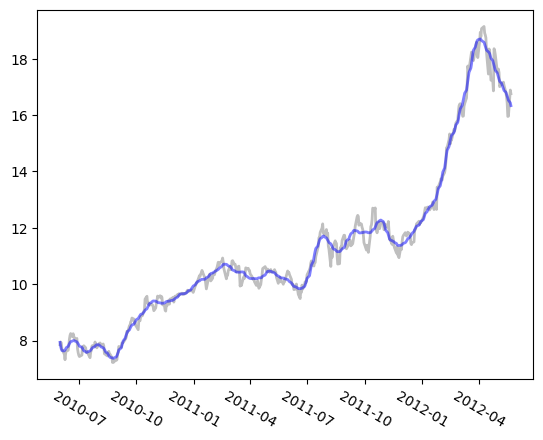

In [54]:
df2 = df.iloc[0:500]

df2["close_smooth"] = savgol_filter(df2.Close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)

price, = ax.plot(df2.index, df2.Close, color='grey', linewidth=2, alpha=0.5, zorder=5)
price_smooth = ax.plot(df2.index, df2.close_smooth, color='blue', linewidth=2, alpha=0.5, zorder=5)
plt.show()


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


ValueError: ('Lengths must match to compare', (499,), (12,))

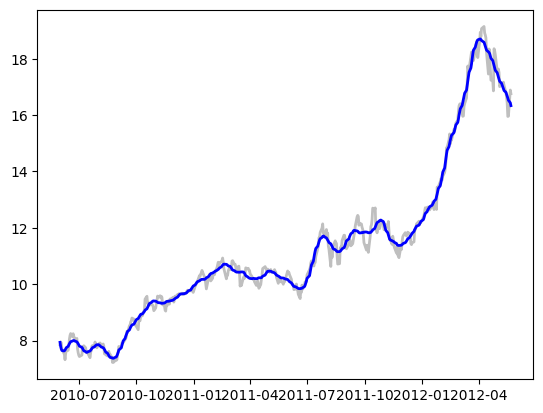

In [55]:
fig, ax = plt.subplots()

# Plot the raw close price
price, = ax.plot(df2.index, df2.Close, color='grey', linewidth=2, alpha=0.5, zorder=5)

# Plot the smoothed close price
smooth, = ax.plot(df2.index, df2.close_smooth, color='blue', linewidth=2, zorder=5)

# Assume df2 has a column 'atr' and the first row(s) might be NaN
atr = df2.atr.iloc[1:]  # all the first ATRs are NaN, so skip them

# Identify peaks (local maxima)
peaks_idx, _ = find_peaks(df2.close_smooth, distance=15, prominence=atr)

# Identify troughs (local minima) by looking for peaks in the inverted data
troughs_idx, _ = find_peaks(-df2.close_smooth, distance=15, prominence=atr)

# Mark the peaks with red circles
ax.plot(
    df2.index[peaks_idx],
    df2.close_smooth.iloc[peaks_idx],
    linestyle='None',
    marker='o',
    markersize=10,
    color='red',
    zorder=10
)

# Mark the troughs with green circles
ax.plot(
    df2.index[troughs_idx],
    df2.close_smooth.iloc[troughs_idx],
    linestyle='None',
    marker='o',
    markersize=10,
    color='green',
    zorder=10
)

plt.show()


In [ ]:
df["atr"].isna().sum()

np.int64(13)